In [29]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import urllib.request

In [6]:
data = pd.read_csv("../data/google_reviews.csv")
data.head()

,Unnamed: 0,평점,리뷰
0,0,5,신당동도 이런 분위기좋고\n핫 한곳이 있었다니..ㅋㅋ\n사장님 부부도 너무친절하시...
1,1,4,"분위기 좋고, 와인 가격도 합리적이네요"
2,2,5,NaN
3,3,3,NaN
4,4,5,NaN


In [7]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.head()

,평점,리뷰
0,5,신당동도 이런 분위기좋고\n핫 한곳이 있었다니..ㅋㅋ\n사장님 부부도 너무친절하시...
1,4,"분위기 좋고, 와인 가격도 합리적이네요"
2,5,NaN
3,3,NaN
4,5,NaN


In [8]:
data["label"] = (data["평점"] > 3).astype(int)
data.head()

,평점,리뷰,label
0,5,신당동도 이런 분위기좋고\n핫 한곳이 있었다니..ㅋㅋ\n사장님 부부도 너무친절하시...,1
1,4,"분위기 좋고, 와인 가격도 합리적이네요",1
2,5,NaN,1
3,3,NaN,0
4,5,NaN,1


In [9]:
data.dropna(inplace=True)
data.head()

,평점,리뷰,label
0,5,신당동도 이런 분위기좋고\n핫 한곳이 있었다니..ㅋㅋ\n사장님 부부도 너무친절하시...,1
1,4,"분위기 좋고, 와인 가격도 합리적이네요",1
6,3,24시간 이라 주말에 방문하기 편리함\n첫 예방접종인데 딱 접종만 하고 끝.\n기본...,0
7,4,24시라 좋아요. 새벽에 강아지가 출혈이 있어서 깜짝 놀랐는데 선생님이 친절하게 설...,1
8,5,푸들12년차 작년10월~13년차 지금까지 용혈성빈혈로 수혈2회에 큰일을 치뤘는데.....,1


<Axes: xlabel='label'>

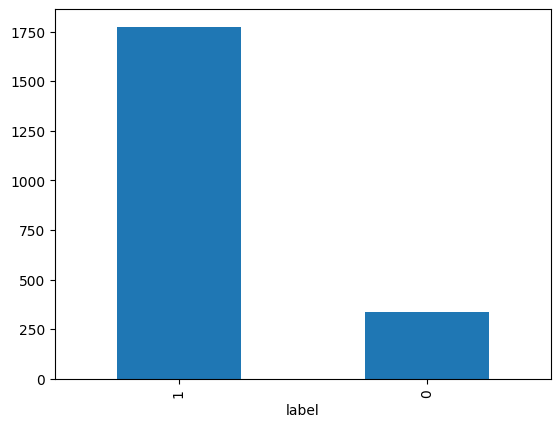

In [10]:
data["label"].value_counts().plot(kind="bar")

In [11]:
negative_upsampled = resample(data[data['label'] == 0], replace=True, n_samples=1750, random_state=42)
google_data = pd.concat([data[data['label'] == 1], negative_upsampled])
google_data = google_data.sample(frac=1, random_state=42).reset_index(drop=True)
google_data.head()

,평점,리뷰,label
0,5,다른동물병원 2곳을 거치고 고양이전문병원인 닥터캣을 가게되었어요!\n왜 더빨리 가지...,1
1,1,택배 전화번호나 똑바로 해라. 엉뚱한 사람 짜증나게 하지말고.\n윤미현 정신차려.,0
2,1,Gave wrong diagnosis for my cat. Kept saying n...,0
3,5,갈 때마다 한결같이 친절하시고 진료도 정말 꼼꼼히 봐주셔요. 집에서 좀 먼 거리이지...,1
4,5,고양이 있음^^,1


<Axes: xlabel='label'>

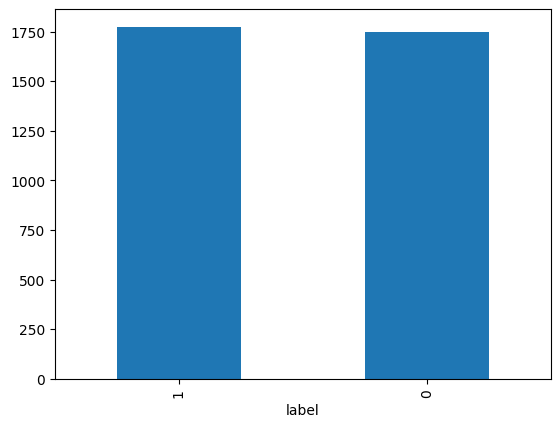

In [12]:
google_data["label"].value_counts().plot(kind="bar")

In [13]:
google_data.rename(columns={"리뷰": "document"}, inplace=True)
google_data.drop(["평점"], axis=1, inplace=True)
google_data.head()

,document,label
0,다른동물병원 2곳을 거치고 고양이전문병원인 닥터캣을 가게되었어요!\n왜 더빨리 가지...,1
1,택배 전화번호나 똑바로 해라. 엉뚱한 사람 짜증나게 하지말고.\n윤미현 정신차려.,0
2,Gave wrong diagnosis for my cat. Kept saying n...,0
3,갈 때마다 한결같이 친절하시고 진료도 정말 꼼꼼히 봐주셔요. 집에서 좀 먼 거리이지...,1
4,고양이 있음^^,1


In [15]:
data = pd.read_csv("../data/kakao_reviews.csv")
data.head()

,store_name,star,review
0,24시 SNC 동물메디컬센터,5,중성화부터 방광염 수술 그리고 염증까지 믿음직스럽게 진료해주시고 처방해주세요 매번 ...
1,24시 SNC 동물메디컬센터,5,새벽에 강아지가 마스크팩을 먹어서 급하게 이곳저곳 전화해봤지만 유일하게 끝까지 통화...
2,24시 SNC 동물메디컬센터,5,검진겸 다니는곳이에요 새벽내내 구토해서 병원을 찾아갔어요ㅠ집 근처에 24시 하는 병...
3,24시 SNC 동물메디컬센터,5,설사랑 혈변 때문에 계속 방문하고 있어요 친절하고 자세하게 설명해주시고 제가 집사...
4,24시 SNC 동물메디컬센터,5,고양이 신부전 때문에 주기적으로 방문하는데 시설도 깔끔하고 무엇보다 고양이를 잘 봐...


In [16]:
data["label"] = (data["star"] > 3).astype(int)
data.head()

,store_name,star,review,label
0,24시 SNC 동물메디컬센터,5,중성화부터 방광염 수술 그리고 염증까지 믿음직스럽게 진료해주시고 처방해주세요 매번 ...,1
1,24시 SNC 동물메디컬센터,5,새벽에 강아지가 마스크팩을 먹어서 급하게 이곳저곳 전화해봤지만 유일하게 끝까지 통화...,1
2,24시 SNC 동물메디컬센터,5,검진겸 다니는곳이에요 새벽내내 구토해서 병원을 찾아갔어요ㅠ집 근처에 24시 하는 병...,1
3,24시 SNC 동물메디컬센터,5,설사랑 혈변 때문에 계속 방문하고 있어요 친절하고 자세하게 설명해주시고 제가 집사...,1
4,24시 SNC 동물메디컬센터,5,고양이 신부전 때문에 주기적으로 방문하는데 시설도 깔끔하고 무엇보다 고양이를 잘 봐...,1


In [17]:
data.dropna(inplace=True)
data.head()

,store_name,star,review,label
0,24시 SNC 동물메디컬센터,5,중성화부터 방광염 수술 그리고 염증까지 믿음직스럽게 진료해주시고 처방해주세요 매번 ...,1
1,24시 SNC 동물메디컬센터,5,새벽에 강아지가 마스크팩을 먹어서 급하게 이곳저곳 전화해봤지만 유일하게 끝까지 통화...,1
2,24시 SNC 동물메디컬센터,5,검진겸 다니는곳이에요 새벽내내 구토해서 병원을 찾아갔어요ㅠ집 근처에 24시 하는 병...,1
3,24시 SNC 동물메디컬센터,5,설사랑 혈변 때문에 계속 방문하고 있어요 친절하고 자세하게 설명해주시고 제가 집사...,1
4,24시 SNC 동물메디컬센터,5,고양이 신부전 때문에 주기적으로 방문하는데 시설도 깔끔하고 무엇보다 고양이를 잘 봐...,1


<Axes: xlabel='label'>

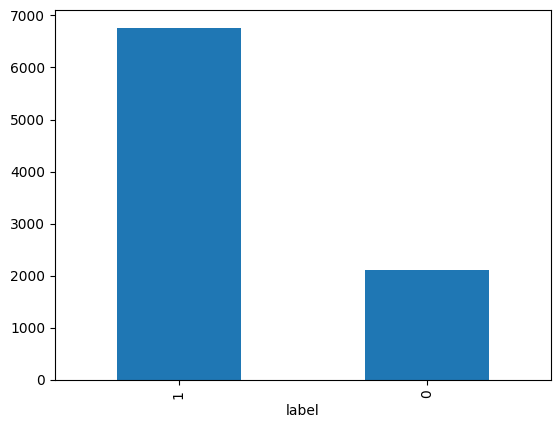

In [18]:
data["label"].value_counts().plot(kind="bar")

In [19]:
len(data[data["star"] > 3])

6761

In [20]:
negative_upsampled = resample(data[data['label'] == 0], replace=True, n_samples=6761, random_state=42)
kakao_data = pd.concat([data[data['label'] == 1], negative_upsampled])
kakao_data = kakao_data.sample(frac=1, random_state=42).reset_index(drop=True)
kakao_data.head()

,store_name,star,review,label
0,태능동물병원,3,방광염으로 카테터시술 3일 입원치료하고 토요일 퇴원했으나 퇴원날부터 전혀 소변못봐서...,0
1,하니동물병원,1,일요일 늦은시간까지 진료 가능하고 선생님도 친절하세요,0
2,올드페리도넛,1,도넛맛집답게 저어어엉말 맛있었어여 ㅠㅅ ㅠ,0
3,알베르,3,"주말의 강남역에서 넉넉히 앉을 수 있는 넓은 카페근데 커피, 디저트, 음료 다 별루",0
4,강서동물병원,5,병원 바닥에 개똥있는데 치우지도 않는 건 왜죠... ? 고양이한테 후시딘발라줘도 되...,1


<Axes: xlabel='label'>

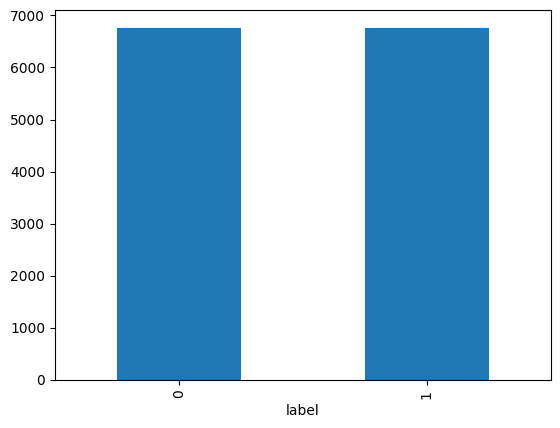

In [21]:
kakao_data['label'].value_counts().plot(kind="bar")

In [22]:
kakao_data.drop(["store_name", "star"], axis=1, inplace=True)
kakao_data.head()

,review,label
0,방광염으로 카테터시술 3일 입원치료하고 토요일 퇴원했으나 퇴원날부터 전혀 소변못봐서...,0
1,일요일 늦은시간까지 진료 가능하고 선생님도 친절하세요,0
2,도넛맛집답게 저어어엉말 맛있었어여 ㅠㅅ ㅠ,0
3,"주말의 강남역에서 넉넉히 앉을 수 있는 넓은 카페근데 커피, 디저트, 음료 다 별루",0
4,병원 바닥에 개똥있는데 치우지도 않는 건 왜죠... ? 고양이한테 후시딘발라줘도 되...,1


In [23]:
kakao_data.rename(columns={"review": "document"}, inplace=True)
kakao_data.head()

,document,label
0,방광염으로 카테터시술 3일 입원치료하고 토요일 퇴원했으나 퇴원날부터 전혀 소변못봐서...,0
1,일요일 늦은시간까지 진료 가능하고 선생님도 친절하세요,0
2,도넛맛집답게 저어어엉말 맛있었어여 ㅠㅅ ㅠ,0
3,"주말의 강남역에서 넉넉히 앉을 수 있는 넓은 카페근데 커피, 디저트, 음료 다 별루",0
4,병원 바닥에 개똥있는데 치우지도 않는 건 왜죠... ? 고양이한테 후시딘발라줘도 되...,1


In [24]:
merged_data = pd.concat([google_data, kakao_data], ignore_index=True)
merged_data.head()

,document,label
0,다른동물병원 2곳을 거치고 고양이전문병원인 닥터캣을 가게되었어요!\n왜 더빨리 가지...,1
1,택배 전화번호나 똑바로 해라. 엉뚱한 사람 짜증나게 하지말고.\n윤미현 정신차려.,0
2,Gave wrong diagnosis for my cat. Kept saying n...,0
3,갈 때마다 한결같이 친절하시고 진료도 정말 꼼꼼히 봐주셔요. 집에서 좀 먼 거리이지...,1
4,고양이 있음^^,1


In [25]:
merged_data.drop_duplicates(subset=['document'], inplace=True)
merged_data['document'] = merged_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)
merged_data['document'] = merged_data['document'].str.replace('^ +', "")
merged_data['document'].replace('', np.nan, inplace=True)
merged_data = merged_data.dropna(how='any')
print('전처리 후 데이터 개수 :',len(merged_data))

전처리 후 데이터 개수 : 10527


/var/folders/1g/mh4r7xrj5gg2lcbjp9rv33fr0000gn/T/ipykernel_5587/3706393539.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['document'].replace('', np.nan, inplace=True)


In [26]:
train_data, test_data = train_test_split(merged_data, test_size=0.2, random_state=42, shuffle=True)
len(train_data), len(test_data)

(8421, 2106)

In [28]:
train_data.to_csv("../data/train_reviews.csv")
test_data.to_csv("../data/test_reviews.csv")

In [44]:
total_data = pd.read_table('https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data))

전체 리뷰 개수 : 200000


In [45]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data.head()

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [46]:
total_data.isnull().sum()

ratings    0
reviews    0
label      0
dtype: int64

<Axes: xlabel='label'>

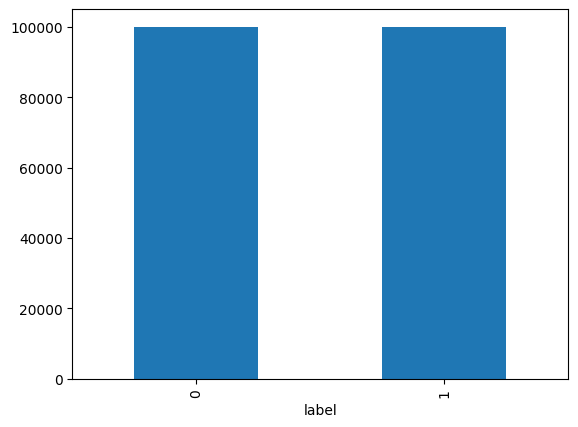

In [47]:
total_data["label"].value_counts().plot(kind="bar")

In [48]:
total_data.drop(["ratings"], axis=1, inplace=True)
total_data.rename(columns={"reviews": "document"}, inplace=True)
total_data.head()

,document,label
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [49]:
total_data.to_csv("../data/naver_shopping_reviews.csv")